<img src ="그룹연산.jpg">

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
df=sns.load_dataset('titanic')

In [40]:
df=sns.load_dataset('titanic')
df=df.loc[:,['age','sex','class','fare','survived']]

df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [41]:
df.value_counts('class')


class
Third     491
First     216
Second    184
dtype: int64

In [46]:
dfg=df.groupby(['class'])

# list(dfg)
for k,g in dfg:
    print(k)
    print(len(g))

First
216
Second
184
Third
491


In [47]:
avg=dfg.mean()
avg

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [55]:
dfm=dfg.max()
dfm

,age,sex,fare,survived
class,,,,
First,80.0,male,512.3292,1
Second,70.0,male,73.5000,1
Third,74.0,male,69.5500,1


In [70]:
dfg.get_group('Third').describe()


,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [ ]:
g2=df.groupby(['class','sex'])
for k,g in g2:
    print(k)
    print(g)

In [ ]:
avg2=g2.mean()
avg2

In [ ]:
g2tf=g2.get_group(('Third','female'))
g2tf

In [93]:
g2tf[['age','fare']].describe()

,age,fare
count,102.000000,144.000000
mean,21.750000,16.118810
std,12.729964,11.690314
min,0.750000,6.750000
25%,14.125000,7.854200
50%,21.500000,12.475000
75%,29.750000,20.221875
max,63.000000,69.550000


<img src ="agg.jpg">

In [ ]:
#최대값- 최소값 반환하는 사용자 함수 만들고 agg()에 전달하여 그룹별로 집계하여 저장후 처음 5개행 출력


In [189]:
df=sns.load_dataset('titanic')
df=df.loc[:,['age','sex','class','fare','survived']]
grp=df.groupby(['class'])
amm=grp.agg((min,max))
amm

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [190]:
#grouped.agg({'age':'mean','fare':('min','max')})
amm=grp.agg({'age':'mean','fare':('min','max')})
amm

age fare          
             mean  min       max
class                           
First   38.233441  0.0  512.3292
Second  29.877630  0.0   73.5000
Third   25.140620  0.0   69.5500

In [191]:
df=sns.load_dataset('titanic')
df=df.loc[:,['age','sex','class','fare','survived']]
grouped=df.groupby(['class'])
grouped.count()

ft=grouped.filter((lambda x : len(x) >= 200))
ft.head(5)


,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [192]:
age_filter = grouped.filter(lambda x : x.age.mean() < 30)
age_filter.tail(5)

,age,sex,class,fare,survived
884,25.0,male,Third,7.050,0
885,39.0,female,Third,29.125,0
886,27.0,male,Second,13.000,0
888,NaN,female,Third,23.450,0
890,32.0,male,Third,7.750,0


In [193]:
grouped.describe()

age                                                       fare  \
        count       mean        std   min   25%   50%   75%   max  count   
class                                                                      
First   186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
Second  173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
Third   355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                   ...                 survived                                \
             mean  ...   75%       max    count      mean       std  min  25%   
class              ...                                                          
First   84.154687  ...  93.5  512.3292    216.0  0.629630  0.484026  0.0  0.0   
Second  20.662183  ...  26.0   73.5000    184.0  0.472826  0.500623  0.0  0.0   
Third   13.675550  ...  15.5   69.5500    491.0  0.242363  0.428949  0.0  0.0   

                       
        50%  75%  max  
class                  
First   1.0  1.0  1.0  
Second  0.0  1.0  1.0  
Third   0.0  0.0  1.0  

[3 rows x 24 columns]

In [206]:
def z_score(x):
    print(type(x))
    return (x-x.mean())/x.std()

grouped.apply(lambda x: (x-x.mean())/x.std())

C:/Users/admin/AppData/Local/Temp/xpython_9812/123290532.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  grouped.apply(lambda x: (x-x.mean())/x.std())


,age,fare,sex,survived
0,-0.251342,-0.545549,NaN,-0.565014
1,-0.015770,-0.164217,NaN,0.765188
2,0.068776,-0.488239,NaN,1.766263
3,-0.218434,-0.396205,NaN,0.765188
4,0.789041,-0.477626,NaN,-0.565014
...,...,...,...,...
886,-0.205529,-0.571063,NaN,-0.944475
887,-1.299306,-0.690922,NaN,0.765188
888,NaN,0.829880,NaN,-0.565014
889,-0.826424,-0.690922,NaN,0.765188


In [195]:
grouped[['age']].transform(lambda x : z_score(x))


,age
0,-0.251342
1,-0.015770
2,0.068776
3,-0.218434
4,0.789041
...,...
886,-0.205529
887,-1.299306
888,NaN
889,-0.826424


In [196]:
grouped[['age']].apply(lambda x : z_score(x))

,age
0,-0.251342
1,-0.015770
2,0.068776
3,-0.218434
4,0.789041
...,...
886,-0.205529
887,-1.299306
888,NaN
889,-0.826424


In [197]:
grouped_two=df.groupby(['class','sex'])

In [198]:
grouped_two.get_group(('First'))

<class 'ValueError'>: must supply a tuple to get_group with multiple grouping keys

In [199]:
grouped_two.get_group(('Third','female'))

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0
...,...,...,...,...,...
863,NaN,female,Third,69.5500,0
875,15.0,female,Third,7.2250,1
882,22.0,female,Third,10.5167,0
885,39.0,female,Third,29.1250,0


In [6]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.copy()
df = df.loc[:,['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [10]:
# 행, 열, 값 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,
                     index = 'class', # 행 위치에 들어갈 열
                     columns = 'sex', # 열 위치에 들어갈 열
                     values = 'age', # 데이터로 사용할 열
                     aggfunc = 'mean') # 데이터 집계 함수
pdf1.head()

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [12]:
pdf2 = pd.pivot_table(df,
                     index = 'class', # 행 위치에 들어갈 열
                     columns = 'sex', # 열 위치에 들어갈 열
                     values = 'survived', # 데이터로 사용할 열
                     aggfunc = ['mean','sum']) # 데이터 집계 함수
pdf2.head()

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [15]:
pdf3 = pd.pivot_table(df,
                     index = ['class','sex'], # 행 위치에 들어갈 열
                     columns = 'survived', # 열 위치에 들어갈 열
                     values = ['age','fare'], # 데이터로 사용할 열
                     aggfunc = ['mean','max']) # 데이터 집계 함수
pdf3.head()

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875

In [ ]:
# Q titanic 데이터에 대하여 피벗을 사용하여 의미있는 탐색을 수행하고 2가지 이상의 인사이트를 기술하세요.

In [16]:
pdf3 = pd.pivot_table(df,
                     index = 'class',
                     columns = 'survived',
                     values = ['fare'],
                     aggfunc = ['mean','max','min'])
pdf3

mean                max            min         
               fare               fare           fare         
survived          0          1       0         1    0        1
class                                                         
First     64.684007  95.608029  263.00  512.3292  0.0  25.9292
Second    19.412328  22.055700   73.50   65.0000  0.0  10.5000
Third     13.669364  13.694887   69.55   56.4958  0.0   0.0000

In [18]:
df = titanic.copy()
pdf1 = pd.pivot_table(df,
                    index = ['class','alone'], 
                    columns =['sex'],  
                    values = 'survived',  
                    aggfunc = ['mean','sum'])  
pdf1.head()


mean              sum     
sex             female      male female male
class  alone                                
First  False  0.966667  0.425532     58   20
       True   0.970588  0.333333     33   25
Second False  0.931818  0.277778     41   10
       True   0.906250  0.097222     29    7
Third  False  0.416667  0.180723     35   15

In [20]:
pdf4 = pd.pivot_table(df,index = ['class'], #행 위치에 들어갈 열
                    columns = 'sex', # 열 위치에 들어갈 열
                    values = ['fare'], #데이터로 사용할 열
                    aggfunc = ['max','mean'] #데이터 집계 함수
                     ) 
display(pdf4)

max                  mean           
            fare                  fare           
sex       female      male      female       male
class                                            
First   512.3292  512.3292  106.125798  67.226127
Second   65.0000   73.5000   21.970121  19.741782
Third    69.5500   69.5500   16.118810  12.661633

In [21]:
titanic = sns.load_dataset('titanic')
df = titanic.copy()

def get_catrgory(age):
    cat=''
    if age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <=19: cat='Teenager'
    elif age <=35: cat='Young_adult'
    elif age <=60: cat='Adult'
    else: cat='Elderly'
    return cat

df['age_cat'] = df.age.apply(lambda x: get_catrgory(x))


pdf=pd.pivot_table(df, index = ['class','sex'],columns='age_cat' ,values='survived', aggfunc=['mean','sum'])
pdf.head()


mean                                                   sum  \
age_cat           Adult      Baby Child   Elderly  Teenager Young_adult Adult   
class  sex                                                                      
First  female  0.972222  0.000000   NaN  1.000000  1.000000    0.969697    35   
       male    0.370370  1.000000   1.0  0.181818  0.250000    0.535714    20   
Second female  0.850000  1.000000   1.0  1.000000  1.000000    0.921053    17   
       male    0.037037  1.000000   1.0  0.250000  0.100000    0.060000     1   
Third  female  0.142857  0.733333   0.0  0.604651  0.590909    0.476190     2   

                                                       
age_cat       Baby Child Elderly Teenager Young_adult  
class  sex                                             
First  female    0     0      11       13          32  
       male      2     1       6        1          15  
Second female    5     3       2        8          35  
       male      8     1       3        1           3  
Third  female   11     0      26       13          20

시계열 데이터
- df의 행인덱스로 사용하면 시간으로 기록된 데이터를 분석하는 것이 매우 유용
- 특정 시점을 기록하는 Timestamp와 두 시점 사이의 일정한 기간을 나타내는 Period가 있음
- 문자열 또는 숫자로 저장되어 있는 시간 데이터를 시계열 객체인 Timestamp로 변환하는 함수를 제공
- 판다스 to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datetime64 자료형으로 변환 가능

In [23]:
import pandas as pd
df = pd.read_csv('stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [25]:
df['new_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [26]:
df1 = df.copy()
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [27]:
df1 = df1.reset_index()
df1.head()

,new_Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [29]:
df1 = df.copy()
df1['Year'] = df1.new_Date.dt.year
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018


In [30]:
df1['Month'] = df1.new_Date.dt.month
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6


In [31]:
# 일정한 기간을 나타내는 Period 객체로 변환
df1['Date_m'] = df1.new_Date.dt.to_period(freq='M')
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,2018-06


In [32]:
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07
2018-06-29,10700,10550,10900,9990,170253,2018,6,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018,6,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018,6,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018,6,2018-06


In [37]:
df_y = df1.loc['2018-07']
df_y

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07


In [38]:
df_d = df1.loc['2018-06-27','Start':'High']
df_d.head()

,Start,High
new_Date,,
2018-06-27,10800,11050


In [39]:
# 날짜 간격
endday = pd.to_datetime('2018-12-25')
df1['time_delta'] = endday - df1.index
df1.set_index('time_delta',inplace=True)
df1.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m
time_delta,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,7,2018-07
179 days,10700,10550,10900,9990,170253,2018,6,2018-06
180 days,10400,10900,10950,10150,155769,2018,6,2018-06
181 days,10900,10800,11050,10500,133548,2018,6,2018-06
182 days,10800,10900,11000,10700,63039,2018,6,2018-06


In [62]:
# 시계열 데이터 만들기
ts_ms = pd.date_range(start = '2019-01-01',
                     end=None,
                     periods=12,
                     freq='MS', # MS 월초, M 월말, 3M 3개월
                     tz='Asia/Seoul')
ts_ms

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00',
               '2019-07-01 00:00:00+09:00', '2019-08-01 00:00:00+09:00',
               '2019-09-01 00:00:00+09:00', '2019-10-01 00:00:00+09:00',
               '2019-11-01 00:00:00+09:00', '2019-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [41]:
df1.shape

(20, 8)

In [53]:
import warnings
warnings.filterwarnings('ignore')
df_a = df1.iloc[:12,:]
df_a['index'] = ts_ms
df_a.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m,index
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,7,2018-07,2019-01-01 00:00:00+09:00
179 days,10700,10550,10900,9990,170253,2018,6,2018-06,2019-02-01 00:00:00+09:00
180 days,10400,10900,10950,10150,155769,2018,6,2018-06,2019-03-01 00:00:00+09:00
181 days,10900,10800,11050,10500,133548,2018,6,2018-06,2019-04-01 00:00:00+09:00
182 days,10800,10900,11000,10700,63039,2018,6,2018-06,2019-05-01 00:00:00+09:00


In [54]:
# df_a.drop('Month',axis=1,inplace=True)
df_a['Month'] = df_a['index'].dt.month
df_a.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m,index
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,1,2018-07,2019-01-01 00:00:00+09:00
179 days,10700,10550,10900,9990,170253,2018,2,2018-06,2019-02-01 00:00:00+09:00
180 days,10400,10900,10950,10150,155769,2018,3,2018-06,2019-03-01 00:00:00+09:00
181 days,10900,10800,11050,10500,133548,2018,4,2018-06,2019-04-01 00:00:00+09:00
182 days,10800,10900,11000,10700,63039,2018,5,2018-06,2019-05-01 00:00:00+09:00


In [55]:
df_a.set_index('Month',inplace=True)
df_a.head()

,Close,Start,High,Low,Volume,Year,Date_m,index
Month,,,,,,,,
1,10100,10850,10900,10000,137977,2018,2018-07,2019-01-01 00:00:00+09:00
2,10700,10550,10900,9990,170253,2018,2018-06,2019-02-01 00:00:00+09:00
3,10400,10900,10950,10150,155769,2018,2018-06,2019-03-01 00:00:00+09:00
4,10900,10800,11050,10500,133548,2018,2018-06,2019-04-01 00:00:00+09:00
5,10800,10900,11000,10700,63039,2018,2018-06,2019-05-01 00:00:00+09:00


<AxesSubplot:xlabel='Month'>

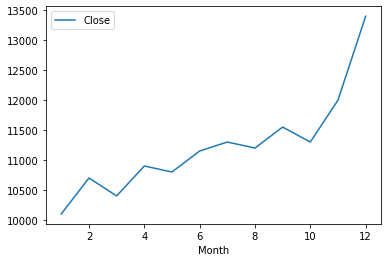

In [49]:
df_g = df_a[['Close']]
df_g.plot()

In [57]:
# df_r = df_a.reset_index()
# df_r
df_a = df_r.set_index('index')
df_a.head()

,Month,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,,
2019-01-01 00:00:00+09:00,1,10100,10850,10900,10000,137977,2018,2018-07
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018,2018-06
2019-03-01 00:00:00+09:00,3,10400,10900,10950,10150,155769,2018,2018-06
2019-04-01 00:00:00+09:00,4,10900,10800,11050,10500,133548,2018,2018-06
2019-05-01 00:00:00+09:00,5,10800,10900,11000,10700,63039,2018,2018-06


In [58]:
df_sorted = df_a.sort_index(ascending=False)
df_sorted.head()

,Month,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,,
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,2018,2018-06
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,2018,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,2018,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018,2018-06
2019-08-01 00:00:00+09:00,8,11200,11350,11750,11200,133002,2018,2018-06


In [59]:
df_value = df_a.sort_values(by='Volume',ascending=False)
df_value.head()

,Month,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,,
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,2018,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018,2018-06
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,2018,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,2018,2018-06
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018,2018-06


In [65]:
# Period 배열

pr_m = pd.period_range(start = '2019-01-01',
                      end = None,
                      periods=3,
                      freq='M') # 월
print(pr_m,'\n')
pr_h = pd.period_range(start = '2019-01-01',
                      end = None,
                      periods=3,
                      freq='2H') # 시간
print(pr_h)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]') 

PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]')


python, numpy, pandas 날짜 타입 비교 및 정리
https://ellun.tistory.com/320

In [67]:
# timestamp -> str 변환
import time
today = time.time()
print(today,type(today),'\n')
s = str(today)
print(s,type(s))

1642396267.5216959 <class 'float'> 

1642396267.5216959 <class 'str'>


In [70]:
# datetime -> str
from datetime import datetime
s = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(s,type(s))

2022-01-17 14:14:14 <class 'str'>


In [75]:
# str -> datetime
s = '2022-01-17 14:14:14'
dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(dt,type(dt))

2022-01-17 14:14:14 <class 'datetime.datetime'>


In [71]:
# str -> timestamp
from datetime import datetime
import time
s = '2022-01-17 14:14:14'
ts = time.mktime(datetime.strptime(s,'%Y-%m-%d %H:%M:%S' ).timetuple())
print(ts)

1642396454.0


In [74]:
# datetime -> timestamp
print(datetime.now(),type(datetime.now()),'\n')
ts = time.mktime(datetime.now().timetuple())
print(ts,type(ts))

2022-01-17 14:21:43.535222 <class 'datetime.datetime'> 

1642396903.0 <class 'float'>


In [11]:
# [과제] 1) str -> datetiem, 2) datetime -> str -> timestamp, 3) timestamp -> str -> datetime
from datetime import datetime
s = '2022-01-17 14:14:22'
dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(dt,type(dt))

2022-01-17 14:14:22 <class 'datetime.datetime'>


In [22]:
from datetime import datetime
import time
st = str(dt)
print(st,type(st))
tst = time.mktime(datetime.strptime(st,'%Y-%m-%d %H:%M:%S').timetuple())
print(tst,type(tst))

2022-01-17 14:14:22 <class 'str'>
1642396462.0 <class 'float'>


In [23]:
from datetime import datetime
import time
tm = time.time()
stm = str(tm)
print(stm,type(stm))
dtm =datetime.fromtimestamp(float(stm))
print(dtm,type(dtm))


1642465778.4056659 <class 'str'>
2022-01-18 09:29:38.405666 <class 'datetime.datetime'>


In [76]:
# 1년전 datetime 값
from datetime import timedelta
import time

datetime_now = datetime.now()
delta_datetime = timedelta(days=-365)
print(delta_datetime)
datetime_now + delta_datetime

-365 days, 0:00:00


datetime.datetime(2021, 1, 17, 14, 40, 16, 360407)

In [77]:
# 두 날짜간의 일수 구하기
from datetime import datetime
since_timestamp = datetime.strptime('20180301','%Y%m%d')
until_timestamp = datetime.strptime('20180331','%Y%m%d')
result = until_timestamp - since_timestamp
result

datetime.timedelta(days=30)

In [82]:
# 특정 요일 구하기
import datetime
def get_yoil(y,m,d):
    days = ['MON','TUE','WED','THU','FRI','SAT','SUN']
    return days[datetime.date(y,m,d).weekday()] # 월요일부터 인덱스 0
get_yoil(2022,1,17)

'MON'

In [85]:
# 판다스 이용
t = pd.Timestamp(1513393335, unit='s', tz='US/Pacific')
print(t,type(t))

2017-12-15 19:02:15-08:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [86]:
today = time.time()
today

1642399723.4088256

In [87]:
date = pd.Timestamp(1642399723.4088256, unit='s', tz='Asia/Seoul')
print(date,type(date))

2022-01-17 15:08:43.408825636+09:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [88]:
pd.to_datetime([1,2,3], unit= 'D', origin=pd.Timestamp('1960-01-10'))

DatetimeIndex(['1960-01-11', '1960-01-12', '1960-01-13'], dtype='datetime64[ns]', freq=None)

In [90]:
pr_m = pd.period_range(start='2019-01-01', end=None, periods=3, freq='M')
pr_m

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')

In [92]:
import numpy as np
sr0 = pd.Series(pd.date_range('2021-01-01', periods=10,freq='D'),name='date')
sr1 = pd.Series(np.random.randint(1000,2000,10),name='price')
sr2 = pd.Series((np.random.rand(10)*100).round(2),name='profit')
df = pd.concat([sr0,sr1,sr2],axis=1)
df.head()

,date,price,profit
0,2021-01-01,1249,96.69
1,2021-01-02,1529,46.57
2,2021-01-03,1007,88.88
3,2021-01-04,1750,38.01
4,2021-01-05,1157,6.25


In [2]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [ ]:
# Q. stock-data.csv를 데이터프레임으로 불러와서 으로 변환한 후 년, 월, 일로 분리하고 year를 인덱스로 셋팅하여 출력하세요.

In [ ]:
# Q. stock-data.csv를 데이터프레임으로 불러와서 datetime64 자료형으로 변환한 후에 period로 변환하고 년월일 표기 변경하여 년월을 
# 인덱스로 셋팅하여 출력하세요

In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [27]:
# [과제] 'mpg'를 'kpl'로 환산하여 새로운 열을 생성하고 처음 3개 행을 소수점 아래 둘째 자리에서 반올림하여 출력하세요
new_df = df.copy()
new_df['kpl'] = (new_df.mpg / 2.352)
new_df.head(3).round(1)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.7
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.4
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.7


In [30]:
# [과제] horsepower 열을 체크해서 전처리가 필요한 사항을 기술하세요(자료형 타입이 문자로 되어있는 이유 및 float로 처리)
# (hint : np.nan으로 대체)

df1 = df.copy()
df1.horsepower = df1.horsepower.replace('?',np.nan)
sr1 = pd.to_numeric(df1.horsepower, errors = 'coerce')
df1['horsepower'] = sr1

print(df1.horsepower.isnull().sum())
df_sorted = df1.sort_values(by='horsepower',ascending=False)
df_sorted


6


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
116,16.0,8,400.0,230.0,4278,9.5,73,1,pontiac grand prix
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw)
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
...,...,...,...,...,...,...,...,...,...
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


In [ ]:
# [과제] horsepower 열의 자료형 타입 문제를 해결하고 NAN 값의 개수를 NAN값 처리 전 후로 비교하세요.

In [ ]:
# [과제] auto_df를 바이너리 파일로 auto_df.pkl로 저장 후 다시 불러오세요.

import csv
import pickle
auto_df.to_pickle('./dataset/auto_df.pkl') # 저장
df2 = pd.read_pickle('./dataset/auto_df.pkl') # 불러오기
df2



In [ ]:
# [과제] horsepower 열의 최대값의 절대값으로 horsepower 열의 모든 데이터를 나눠서 저장하세요.

df.horsepower=df.horsepower.agg(lambda x : x/abs(max(x)))
display(df.horsepower.head())
df1=df.copy()


In [ ]:
# [과제] horsepower 각 열 데이터에서 해당 열의 최소값을 뺀 값을 분자, 해당 열의 최대값 - 최소값을 분모로 계산하여 저장하세요
a=min(df.horsepower)
b=max(df.horsepower)
df.horsepower=df.horsepower.apply(lambda x:(x-a)/(b-a))
df.horsepower.head()


In [39]:
# [과제] origin열의 고유값을 출력하세요
df.origin.unique()


array([1, 3, 2], dtype=int64)

In [ ]:
# [과제] 정수형 데이터를 문자형 데이터로 변환한 후 고유값을 출력하세요(1:'USA',2:'EU',3:'JAPAN')

auto_df2.origin.replace([1,2,3],['USA','EU','JAPAN'],inplace = True)
auto_df2.origin.unique()


In [40]:
# [과제] origin 열의 자료형을 확인하고 범주형(category)으로 변환하여 출력하세요.

df['origin'] = df['origin'].astype('category')
print(df['origin'].dtype)


category


In [41]:
# [과제] origin열을 범주형에서 문자열로 변환한 후 자료형을 출력하세요.
df['origin'] = df['origin'].astype('string')
print(df['origin'].dtype)


string


In [42]:
# [과제] hrosepower를 3개의 bin으로 나누고 bin_names = ['저출력','보통출력','고출력']으로 출력하세요.
# np.histogram() 함수로 3개의 bin으로 나눔
import numpy as np
count,bin_dividers = np.histogram(np.array(new_auto_df.horsepower),
                bins=3,
                range=[new_auto_df.horsepower.min(),new_auto_df.horsepower.max()],
                normed=None,
                weights=None,
                density=None)
print(bin_dividers)
bin_names = ['저출력','보통출력','고출력']
pd.cut(x=new_auto_df.horsepower,bins=bin_dividers,labels=bin_names,include_lowest=True)


<class 'NameError'>: name 'new_auto_df' is not defined

In [ ]:
# [과제] horsepower 열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후 통계요약표를 

auto_df['horsepower_1'] = auto_df['horsepower']/abs(auto_df['horsepower'].max())
auto_df[['horsepower_1']].describe()
